In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
bike = pd.read_csv("C:\\Users\\hp\\Desktop\\ned\\Data Visualization\\bikeshared\\day.csv")

In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


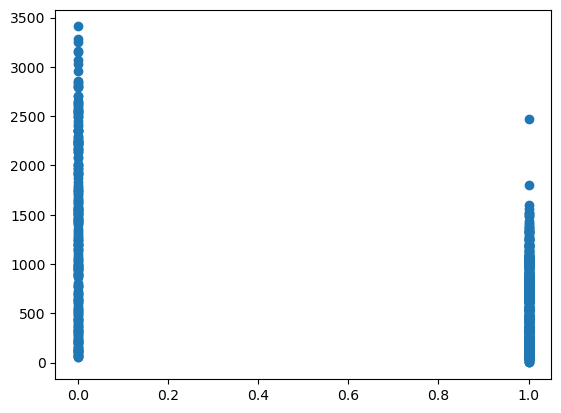

In [7]:
plt.scatter(bike.workingday,bike.casual)
plt.show()

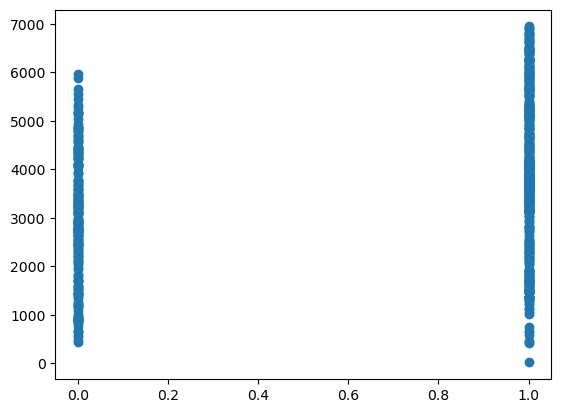

In [8]:
plt.scatter(bike.workingday,bike.registered)
plt.show()

In [10]:
bike[bike["workingday"] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,1248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [11]:
bike.shape

(731, 16)

In [15]:
pd.pivot_table(bike,index  = "workingday" ,values = ["registered","casual"],aggfunc="mean")

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


In [17]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [18]:
bike.index

RangeIndex(start=0, stop=731, step=1)

In [19]:
bike[bike['workingday'] == 0][["registered","casual"]].mean()

registered    2959.034632
casual        1371.134199
dtype: float64

In [20]:
w_mean=pd.pivot_table(bike,index  = "workingday" ,values = ["registered","casual"],aggfunc="mean")

In [21]:
w_mean

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


In [22]:
w_mean['casual']

workingday
0    1371.134199
1     606.570000
Name: casual, dtype: float64

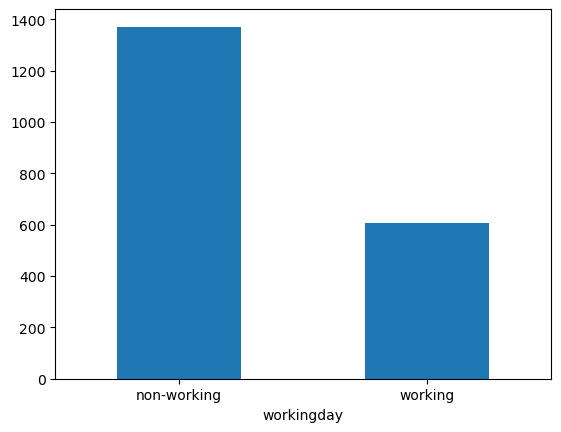

In [24]:
w_mean['casual'].plot.bar()
plt.xticks(ticks = [0,1],labels = ["non-working","working"],rotation=0 )
plt.show()

In [26]:
bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [29]:
bike['dteday'] = pd.to_datetime(bike['dteday'])

In [32]:
bike['dteday'].dt.day

0       1
1       2
2       3
3       4
4       5
       ..
726    27
727    28
728    29
729    30
730    31
Name: dteday, Length: 731, dtype: int64

In [35]:
bike[['dteday','weekday']]

,dteday,weekday
0,2011-01-01,6
1,2011-01-02,0
2,2011-01-03,1
3,2011-01-04,2
4,2011-01-05,3
...,...,...
726,2012-12-27,4
727,2012-12-28,5
728,2012-12-29,6
729,2012-12-30,0


In [37]:
bike['dteday'].dt.strftime("%A %B")

0       Saturday January
1         Sunday January
2         Monday January
3        Tuesday January
4      Wednesday January
             ...        
726    Thursday December
727      Friday December
728    Saturday December
729      Sunday December
730      Monday December
Name: dteday, Length: 731, dtype: object

In [39]:
bike.pivot_table(index ='workingday' ,values = ["registered","casual"],aggfunc = 'mean')

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


In [43]:
week_group = bike.groupby("weekday")

In [47]:
pd.options.display.max_rows = None

In [48]:
week_group.groups

{0: [1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99, 106, 113, 120, 127, 134, 141, 148, 155, 162, 169, 176, 183, 190, 197, 204, 211, 218, 225, 232, 239, 246, 253, 260, 267, 274, 281, 288, 295, 302, 309, 316, 323, 330, 337, 344, 351, 358, 365, 372, 379, 386, 393, 400, 407, 414, 421, 428, 435, 442, 449, 456, 463, 470, 477, 484, 491, 498, 505, 512, 519, 526, 533, 540, 547, 554, 561, 568, 575, 582, 589, 596, 603, 610, 617, 624, 631, 638, 645, 652, 659, 666, 673, 680, 687, 694, ...], 1: [2, 9, 16, 23, 30, 37, 44, 51, 58, 65, 72, 79, 86, 93, 100, 107, 114, 121, 128, 135, 142, 149, 156, 163, 170, 177, 184, 191, 198, 205, 212, 219, 226, 233, 240, 247, 254, 261, 268, 275, 282, 289, 296, 303, 310, 317, 324, 331, 338, 345, 352, 359, 366, 373, 380, 387, 394, 401, 408, 415, 422, 429, 436, 443, 450, 457, 464, 471, 478, 485, 492, 499, 506, 513, 520, 527, 534, 541, 548, 555, 562, 569, 576, 583, 590, 597, 604, 611, 618, 625, 632, 639, 646, 653, 660, 667, 674, 681, 688, 695, ...], 2: [3, 10, 1

In [49]:
week_group.get_group(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
16,17,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
23,24,2011-01-24,1,0,1,0,1,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
30,31,2011-01-31,1,0,1,0,1,1,2,0.180833,0.186250,0.603750,0.187192,42,1459,1501
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
51,52,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
58,59,2011-02-28,1,0,2,0,1,1,2,0.407273,0.400118,0.876364,0.289686,81,1365,1446
65,66,2011-03-07,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352,244,1628,1872


In [51]:
week = week_group[['registered','casual']].mean()

In [52]:
week

,registered,casual
weekday,,
0,2890.533333,1338.295238
1,3663.990476,674.133333
2,3954.480769,556.182692
3,3997.394231,551.144231
4,4076.298077,590.961538
5,3938.000000,752.288462
6,3085.285714,1465.257143


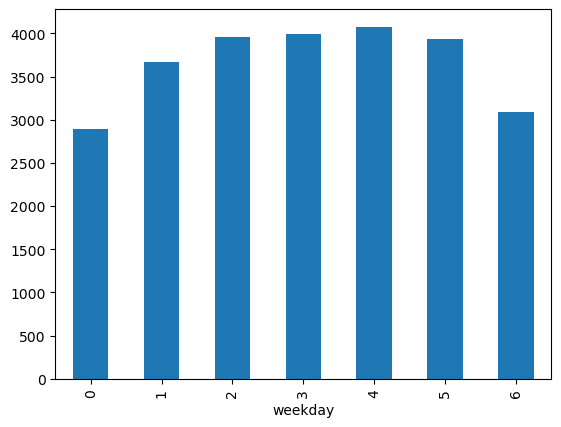

In [53]:
week['registered'].plot.bar()
plt.show()

In [55]:
bike.weathersit

0      2
1      2
2      1
3      1
4      1
5      1
6      2
7      2
8      1
9      1
10     2
11     1
12     1
13     1
14     2
15     1
16     2
17     2
18     2
19     2
20     1
21     1
22     1
23     1
24     2
25     3
26     1
27     2
28     1
29     1
30     2
31     2
32     2
33     1
34     2
35     2
36     1
37     1
38     1
39     2
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     2
52     1
53     1
54     2
55     2
56     1
57     1
58     2
59     1
60     1
61     1
62     2
63     2
64     2
65     1
66     1
67     2
68     3
69     2
70     1
71     1
72     1
73     2
74     2
75     1
76     1
77     1
78     1
79     2
80     1
81     2
82     2
83     1
84     1
85     2
86     1
87     1
88     2
89     3
90     2
91     2
92     1
93     1
94     2
95     1
96     1
97     2
98     2
99     2
100    2
101    2
102    2
103    1
104    1
105    3
106    1
107    1
108    2
109    1
110    1
1

In [56]:
bike.weathersit.unique()

array([2, 1, 3], dtype=int64)

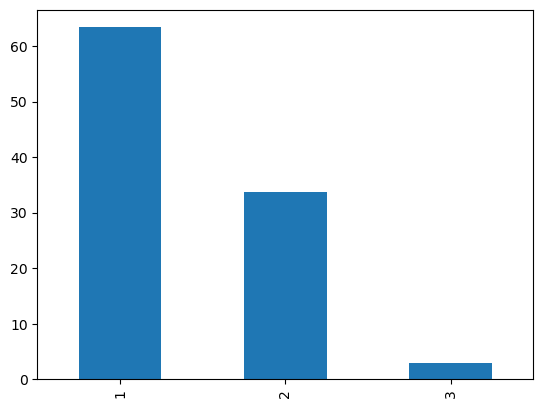

In [61]:
(bike.weathersit.value_counts(normalize='True')*100).plot.bar()
plt.show()

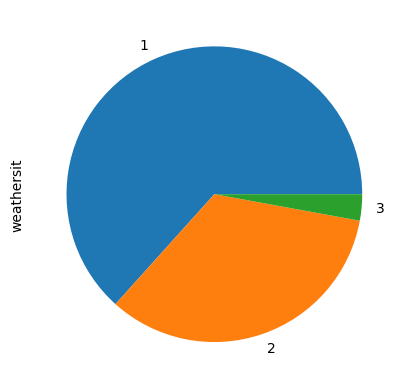

In [62]:
(bike.weathersit.value_counts(normalize='True')*100).plot.pie()
plt.show()

In [63]:
bike.yr

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [68]:
bike.yr.map({0:2011,1:2012})

TypeError: Series.map() got an unexpected keyword argument 'inplace'

In [69]:
bike.yr.replace({0:2011,1:2012},inplace = True)

In [70]:
bike.yr

0      2011
1      2011
2      2011
3      2011
4      2011
5      2011
6      2011
7      2011
8      2011
9      2011
10     2011
11     2011
12     2011
13     2011
14     2011
15     2011
16     2011
17     2011
18     2011
19     2011
20     2011
21     2011
22     2011
23     2011
24     2011
25     2011
26     2011
27     2011
28     2011
29     2011
30     2011
31     2011
32     2011
33     2011
34     2011
35     2011
36     2011
37     2011
38     2011
39     2011
40     2011
41     2011
42     2011
43     2011
44     2011
45     2011
46     2011
47     2011
48     2011
49     2011
50     2011
51     2011
52     2011
53     2011
54     2011
55     2011
56     2011
57     2011
58     2011
59     2011
60     2011
61     2011
62     2011
63     2011
64     2011
65     2011
66     2011
67     2011
68     2011
69     2011
70     2011
71     2011
72     2011
73     2011
74     2011
75     2011
76     2011
77     2011
78     2011
79     2011
80     2011
81     2011
82     2011
83  

In [72]:
Bifurcated_Data= bike.groupby("yr")["weathersit"].value_counts()

In [73]:
Bifurcated_Data

yr    weathersit
2011  1             226
      2             124
      3              15
2012  1             237
      2             123
      3               6
Name: weathersit, dtype: int64

In [74]:
Bifurcated_Data[2011]

weathersit
1    226
2    124
3     15
Name: weathersit, dtype: int64

<Axes: xlabel='weathersit'>

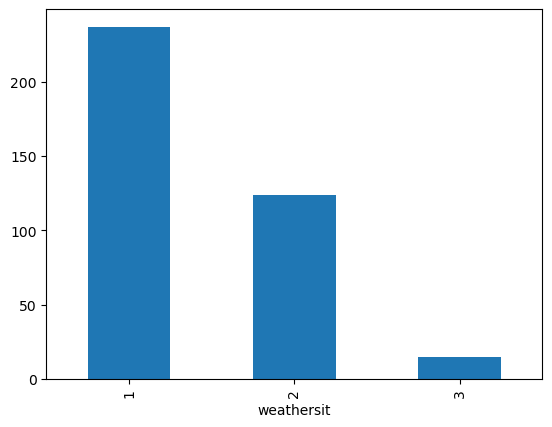

In [76]:
Bifurcated_Data[2011].plot.bar()


<Axes: xlabel='weathersit'>

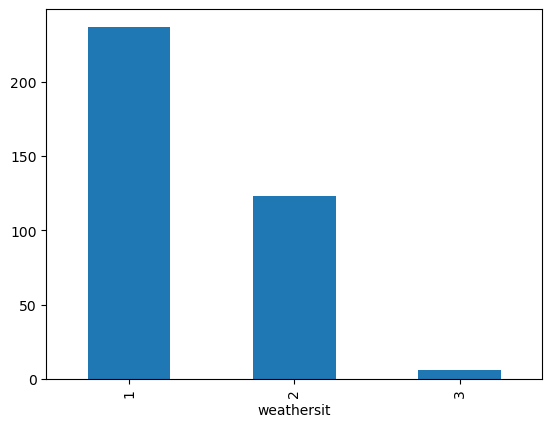

In [77]:
Bifurcated_Data[2012].plot.bar()

# Sea born --

Conditional formatting 

behind sea born pandas is working 

behind pandas plotting matplotlib is woking

In [78]:
import seaborn as sns


In [79]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_core',
 '_decorators',
 '_docstrings',
 '_oldcore',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load

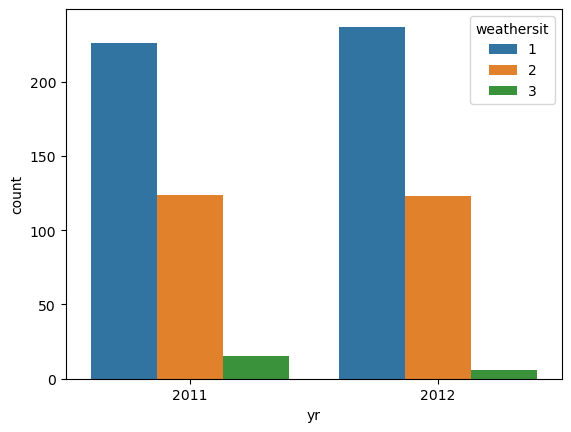

In [83]:
sns.countplot(data=bike,x="yr",hue= "weathersit")
plt.show()

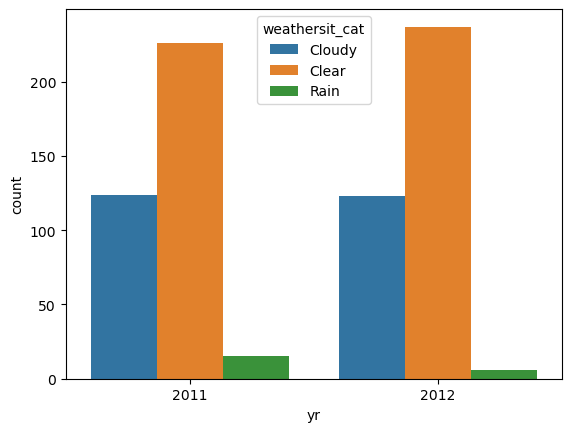

In [87]:
bike["weathersit_cat"] =bike.weathersit.map({1:"Clear",2:"Cloudy",3:"Rain"}) 
sns.countplot(data=bike,x="yr",hue= "weathersit_cat")
plt.show()

In [88]:
bike.cnt.unique()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49

In [91]:
bike.cnt.unique().size

696

In [92]:
len(bike.cnt.unique())

696

In [94]:
bike.cnt.value_counts(bins=10)

(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: cnt, dtype: int64

In [95]:
bike.cnt.value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

<Axes: ylabel='Frequency'>

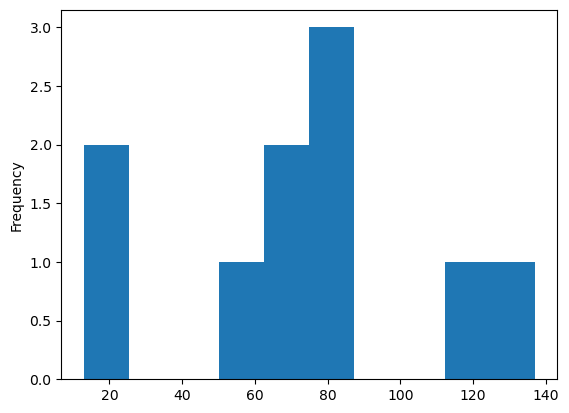

In [96]:
bike.cnt.value_counts(bins=10).sort_index().plot.hist()

In [97]:
cnt = bike.cnt.value_counts(bins=10).sort_index()

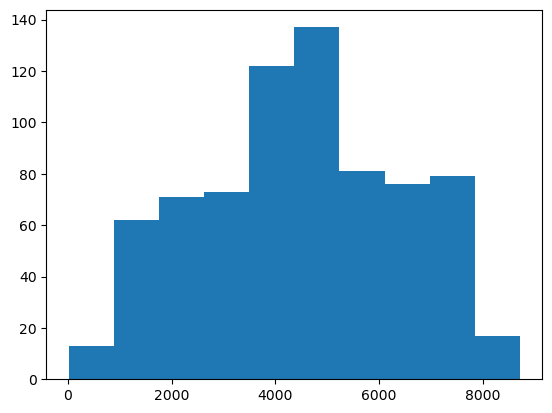

In [98]:
plt.hist(bike['cnt'])
plt.show()

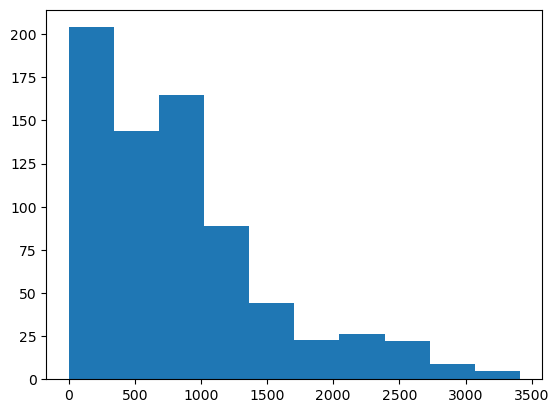

In [99]:
plt.hist(bike['casual'])
plt.show()